In [1]:
from google.colab import drive
drive.mount('/content/gdrive/')

Mounted at /content/gdrive/


In [2]:
import os
os.chdir('/content/gdrive/My Drive/파이썬 부캠/archive')

In [3]:
import warnings
warnings.filterwarnings('ignore')
import numpy as np
import pandas as pd 
import matplotlib.pyplot as plt
import seaborn as sns

# 1) Data preparation

In [4]:
# 데이터셋 준비 / 와인 종류 컬럼 추가
red = pd.read_csv("Red.csv"); red['Type'] = 'Red'
rose = pd.read_csv("Rose.csv"); rose['Type'] = 'Rose'
white = pd.read_csv("White.csv"); white['Type'] = 'White'
spark = pd.read_csv("Sparkling.csv"); spark['Type'] = 'Sparkling'

# 모든 종류의 와인을 하나의 데이터셋 'wines'으로 합침
wines = pd.concat([red,rose,white,spark], axis=0, ignore_index=True)
wines

,Name,Country,Region,Winery,Rating,NumberOfRatings,Price,Year,Type
0,Pomerol 2011,France,Pomerol,Château La Providence,4.2,100,95.00,2011,Red
1,Lirac 2017,France,Lirac,Château Mont-Redon,4.3,100,15.50,2017,Red
2,Erta e China Rosso di Toscana 2015,Italy,Toscana,Renzo Masi,3.9,100,7.45,2015,Red
3,Bardolino 2019,Italy,Bardolino,Cavalchina,3.5,100,8.72,2019,Red
4,Ried Scheibner Pinot Noir 2016,Austria,Carnuntum,Markowitsch,3.9,100,29.15,2016,Red
...,...,...,...,...,...,...,...,...,...
13829,Special Cuvée Brut Aÿ Champagne N.V.,France,Champagne,Bollinger,4.2,37765,46.00,N.V.,Sparkling
13830,Brut Premier Champagne N.V.,France,Champagne Premier Cru,Louis Roederer,4.2,40004,36.48,N.V.,Sparkling
13831,Impérial Brut Champagne N.V.,France,Champagne,Moët & Chandon,4.1,76037,40.61,N.V.,Sparkling
13832,Brut (Carte Jaune) Champagne N.V.,France,Champagne,Veuve Clicquot,4.2,86839,43.60,N.V.,Sparkling


In [5]:
print(len(red))
print(len(white))
print(len(spark))
print(len(rose))


8666
3764
1007
397


In [6]:
print(red['Rating'].mean())
print(white['Rating'].mean())
print(spark['Rating'].mean())
print(rose['Rating'].mean())

3.890341564735726
3.817906482465455
3.8808341608738792
3.741309823677579


In [7]:
print(red['Price'].mean())
print(white['Price'].mean())
print(spark['Price'].mean())
print(rose['Price'].mean())



39.145064620356315
20.62031880977665
34.80342601787506
12.525743073047838


In [8]:
spark.head() # 제조 년도 항목에 결측치가 있음을 확인

,Name,Country,Region,Winery,Rating,NumberOfRatings,Price,Year,Type
0,Crémant de Loire Brut 2017,France,Crémant de Loire,Langlois-Chateau,3.9,25,14.41,2017,Sparkling
1,Vicar's Choice Sauvignon Blanc Bubbles 2019,New Zealand,Marlborough,Saint Clair,4.2,25,11.90,2019,Sparkling
2,Crémant de Limoux Brut N.V.,France,Crémant de Limoux,Prima Perla,3.5,25,14.32,N.V.,Sparkling
3,Athesis Brut 2016,Italy,Südtirol - Alto Adige,Kettmeir,4.0,25,21.50,2016,Sparkling
4,Blanc de Blancs Réserve Brut Nature N.V.,Germany,Pfalz,Eymann,3.9,25,31.18,N.V.,Sparkling


In [9]:
wines[:10]

,Name,Country,Region,Winery,Rating,NumberOfRatings,Price,Year,Type
0,Pomerol 2011,France,Pomerol,Château La Providence,4.2,100,95.00,2011,Red
1,Lirac 2017,France,Lirac,Château Mont-Redon,4.3,100,15.50,2017,Red
2,Erta e China Rosso di Toscana 2015,Italy,Toscana,Renzo Masi,3.9,100,7.45,2015,Red
3,Bardolino 2019,Italy,Bardolino,Cavalchina,3.5,100,8.72,2019,Red
4,Ried Scheibner Pinot Noir 2016,Austria,Carnuntum,Markowitsch,3.9,100,29.15,2016,Red
5,Gigondas (Nobles Terrasses) 2017,France,Gigondas,Vieux Clocher,3.7,100,19.90,2017,Red
6,Marion's Vineyard Pinot Noir 2016,New Zealand,Wairarapa,Schubert,4.0,100,43.87,2016,Red
7,Red Blend 2014,Chile,Itata Valley,Viña La Causa,3.9,100,17.52,2014,Red
8,Chianti 2015,Italy,Chianti,Castello Montaùto,3.6,100,10.75,2015,Red
9,Tradition 2014,France,Minervois,Domaine des Aires Hautes,3.5,100,6.90,2014,Red


In [10]:
wines.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 13834 entries, 0 to 13833
Data columns (total 9 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   Name             13834 non-null  object 
 1   Country          13834 non-null  object 
 2   Region           13834 non-null  object 
 3   Winery           13834 non-null  object 
 4   Rating           13834 non-null  float64
 5   NumberOfRatings  13834 non-null  int64  
 6   Price            13834 non-null  float64
 7   Year             13834 non-null  object 
 8   Type             13834 non-null  object 
dtypes: float64(2), int64(1), object(6)
memory usage: 972.8+ KB


In [11]:
wines['Year'].value_counts() #N.Y. 라는 값 존재 -> 숫자 값으로 대체

2018    2723
2017    2412
2016    2294
2015    1678
2014     905
2019     893
N.V.     744
2013     624
2012     423
2011     312
2010     192
2005     160
2008     101
2009      99
2006      64
2007      60
2004      34
2000      19
1999      19
2003      15
2001      12
2002      11
1997       7
1998       7
1996       6
1995       4
1961       3
1992       3
1990       2
1989       2
1993       2
2020       2
1991       1
1988       1
Name: Year, dtype: int64

In [12]:
wines['Year'] = wines['Year'].replace('N.V.', 2030) #다른 연도와 겹치지 않도록 2030으로 대체
wines['Year'] = wines['Year'].astype('int')

In [13]:
# 유로로 표현된 가격을 만원 단위로 변환(1유로 환율: 1350)
wines['Price(\)'] = round((wines['Price']*1350)/10000,2)
wines['Price(\)'] = wines['Price(\)']
wines['Price(\)']

0        12.82
1         2.09
2         1.01
3         1.18
4         3.94
         ...  
13829     6.21
13830     4.92
13831     5.48
13832     5.89
13833    22.95
Name: Price(\), Length: 13834, dtype: float64

In [14]:
wines.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 13834 entries, 0 to 13833
Data columns (total 10 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   Name             13834 non-null  object 
 1   Country          13834 non-null  object 
 2   Region           13834 non-null  object 
 3   Winery           13834 non-null  object 
 4   Rating           13834 non-null  float64
 5   NumberOfRatings  13834 non-null  int64  
 6   Price            13834 non-null  float64
 7   Year             13834 non-null  int64  
 8   Type             13834 non-null  object 
 9   Price(\)         13834 non-null  float64
dtypes: float64(3), int64(2), object(5)
memory usage: 1.1+ MB


In [15]:
len(wines)

13834

In [16]:
wines

,Name,Country,Region,Winery,Rating,NumberOfRatings,Price,Year,Type,Price(\)
0,Pomerol 2011,France,Pomerol,Château La Providence,4.2,100,95.00,2011,Red,12.82
1,Lirac 2017,France,Lirac,Château Mont-Redon,4.3,100,15.50,2017,Red,2.09
2,Erta e China Rosso di Toscana 2015,Italy,Toscana,Renzo Masi,3.9,100,7.45,2015,Red,1.01
3,Bardolino 2019,Italy,Bardolino,Cavalchina,3.5,100,8.72,2019,Red,1.18
4,Ried Scheibner Pinot Noir 2016,Austria,Carnuntum,Markowitsch,3.9,100,29.15,2016,Red,3.94
...,...,...,...,...,...,...,...,...,...,...
13829,Special Cuvée Brut Aÿ Champagne N.V.,France,Champagne,Bollinger,4.2,37765,46.00,2030,Sparkling,6.21
13830,Brut Premier Champagne N.V.,France,Champagne Premier Cru,Louis Roederer,4.2,40004,36.48,2030,Sparkling,4.92
13831,Impérial Brut Champagne N.V.,France,Champagne,Moët & Chandon,4.1,76037,40.61,2030,Sparkling,5.48
13832,Brut (Carte Jaune) Champagne N.V.,France,Champagne,Veuve Clicquot,4.2,86839,43.60,2030,Sparkling,5.89


In [17]:
wines.to_csv('wines.csv', encoding='utf-8', index=False)

In [18]:
# 유로로 표현된 가격을 만원 단위로 변환(1유로 환율: 1350)
wines['Price(\)'] = round((wines['Price']*1350)/10000,2)
wines['Price(\)'] = wines['Price(\)']
wines['Price(\)']

0        12.82
1         2.09
2         1.01
3         1.18
4         3.94
         ...  
13829     6.21
13830     4.92
13831     5.48
13832     5.89
13833    22.95
Name: Price(\), Length: 13834, dtype: float64

# 2) EDA

In [19]:
wines.sample(frac=1).head() #샘플링을 통해 전반적인 정보 확인

,Name,Country,Region,Winery,Rating,NumberOfRatings,Price,Year,Type,Price(\)
12149,The Stump Jump White Blend 2018,Australia,McLaren Vale,d'Arenberg,4.0,236,8.50,2018,White,1.15
8182,Syrah 2018,Italy,Terre Siciliane,Fatascia,3.7,87,7.53,2018,Red,1.02
1333,Single Vineyard Tempranillo 2016,Spain,La Mancha,Volver,4.0,1489,15.70,2016,Red,2.12
4742,Côtes-du-Rhône Rouge 2016,France,Côtes-du-Rhône,E. Guigal,3.7,3752,8.70,2016,Red,1.17
9400,Schlossberg Achkarren GG Grauburgunder 2017,Germany,Baden,Franz Keller,4.1,30,35.00,2017,White,4.72


In [20]:
wines.shape

(13834, 10)

In [21]:
wines.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 13834 entries, 0 to 13833
Data columns (total 10 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   Name             13834 non-null  object 
 1   Country          13834 non-null  object 
 2   Region           13834 non-null  object 
 3   Winery           13834 non-null  object 
 4   Rating           13834 non-null  float64
 5   NumberOfRatings  13834 non-null  int64  
 6   Price            13834 non-null  float64
 7   Year             13834 non-null  int64  
 8   Type             13834 non-null  object 
 9   Price(\)         13834 non-null  float64
dtypes: float64(3), int64(2), object(5)
memory usage: 1.1+ MB


In [22]:
wines.describe()

,Rating,NumberOfRatings,Price,Year,Price(\)
count,13834.000000,13834.000000,13834.000000,13834.000000,13834.000000
mean,3.865664,428.322466,33.024850,2016.309889,4.458411
std,0.296427,1838.413812,70.899893,4.561907,9.571455
min,2.200000,25.000000,3.150000,1961.000000,0.430000
25%,3.700000,56.000000,9.902500,2015.000000,1.340000
50%,3.900000,129.000000,15.950000,2016.000000,2.150000
75%,4.100000,336.000000,32.500000,2018.000000,4.390000
max,4.900000,94287.000000,3410.790000,2030.000000,460.460000


In [23]:
wines.Country.nunique()

33

In [24]:
wines.Country.value_counts()

Italy             3919
France            3436
Spain             1533
Germany           1229
South Africa       846
United States      530
Austria            492
Chile              431
Portugal           336
Australia          318
Argentina          308
New Zealand        165
Brazil              50
Romania             37
Greece              25
Switzerland         23
Israel              23
Hungary             19
Slovenia            18
Moldova             16
Lebanon             16
Luxembourg          14
Georgia             13
Turkey              10
Croatia              6
Uruguay              5
China                3
United Kingdom       3
Canada               3
Czech Republic       2
Slovakia             2
Bulgaria             2
Mexico               1
Name: Country, dtype: int64

In [25]:
wines = pd.read_csv('wines.csv')

In [26]:
# 와인 수출 상위 국가
Most_countries = wines.Country.value_counts()[:12] 

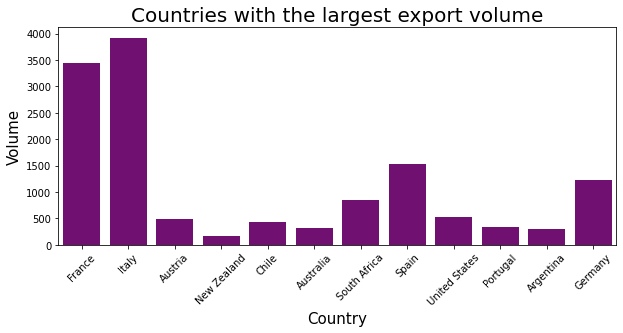

In [27]:
plt.figure(figsize=(10,4))

country = wines.Country.value_counts()[:12]

graph = sns.countplot(x='Country', 
                  data=wines[wines.Country.isin(Most_countries.index.values)],
                 color='purple')
graph.set_title("Countries with the largest export volume", fontsize=20)
graph.set_xlabel("Country", fontsize=15)
graph.set_ylabel("Volume", fontsize=15)
graph.set_xticklabels(graph.get_xticklabels(),rotation=45)

plt.show()

Rating

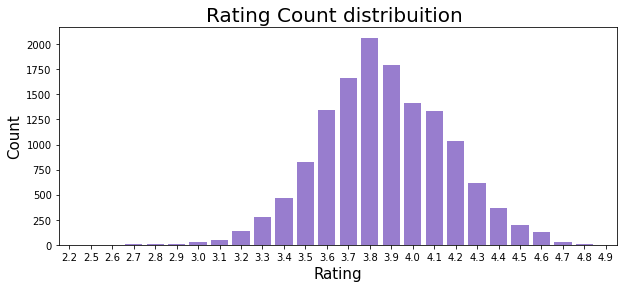

In [28]:
plt.figure(figsize=(10, 4))
graph = sns.countplot(x='Rating', data=wines, color='mediumpurple')
graph.set_title("Rating Count distribuition ", fontsize=20)
graph.set_xlabel("Rating", fontsize=15) 
graph.set_ylabel("Count", fontsize=15)
plt.show()

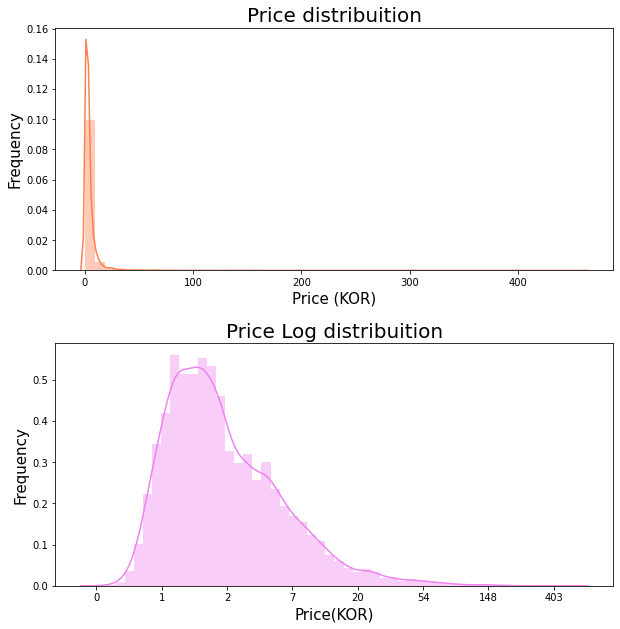

In [29]:
plt.figure(figsize=(10,10))
plt.subplot(2,1,1)
graph = sns.distplot(wines['Price(\)'], color='coral')
graph.set_title("Price distribuition", fontsize=20) # seting title and size of font
graph.set_xlabel("Price (KOR)", fontsize=15) # seting xlabel and size of font
graph.set_ylabel("Frequency", fontsize=15) # seting ylabel and size of font

plt.subplot(2,1,2)
graph1 = sns.distplot(np.log(wines['Price(\)']) , color='violet')
graph1.set_title("Price Log distribuition", fontsize=20) # seting title and size of font
graph1.set_xlabel("Price(KOR)", fontsize=15) # seting xlabel and size of font
graph1.set_ylabel("Frequency", fontsize=15) # seting ylabel and size of font
graph1.set_xticklabels(np.exp(graph1.get_xticks()).astype(int))

plt.subplots_adjust(hspace = 0.3,top = 0.9)
plt.show()

In [30]:
varieties = pd.read_csv("Varieties.csv")
wines['Variety'] = np.nan
for index in wines.index:
    for variety in varieties['Variety']:    
        if variety in wines.loc[index, 'Name']:
            wines.loc[index, 'Variety'] = variety
            break

In [31]:
print('Now we have variety for', wines.Variety.notna().sum(),'wines,',
      '%s%%' % int(wines.Variety.notna().sum()/len(wines)*100), 'of all')

Now we have variety for 5768 wines, 41% of all


In [32]:
# replace NaN's
wines.Variety = wines.Variety.fillna('unknown')

In [ ]:
wines = pd.read_csv("wines.csv")
wines.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 13834 entries, 0 to 13833
Data columns (total 10 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   Name             13834 non-null  object 
 1   Country          13834 non-null  object 
 2   Region           13834 non-null  object 
 3   Winery           13834 non-null  object 
 4   Rating           13834 non-null  float64
 5   NumberOfRatings  13834 non-null  int64  
 6   Price            13834 non-null  float64
 7   Year             13834 non-null  int64  
 8   Type             13834 non-null  object 
 9   Price(\)         13834 non-null  float64
dtypes: float64(3), int64(2), object(5)
memory usage: 1.1+ MB


가격대 변수 Price2 추가

In [33]:
wines['Price2'] = np.nan

for i in range(len(wines)):
    if 0 < wines['Price(\)'][i] < 3.0:
      wines['Price2'][i] = '1~2만원대'
    elif 3.0 <= wines['Price(\)'][i] <5.0:
      wines['Price2'][i] = '3~4만원대'
    elif 5.0 <= wines['Price(\)'][i] <7.0:
      wines['Price2'][i] = '5~6만원대'
    elif 7.0 <= wines['Price(\)'][i] <10.0:
      wines['Price2'][i] = '7~9만원대'
    elif wines['Price(\)'][i] >= 10:
      wines['Price2'][i] = '10만원~'

기념일 여부 추가

In [34]:
wines['Celeb'] = np.nan

for i in range(len(wines)):
  if wines['Type'][i] == 'White':
    wines['Celeb'][i] = 'no'
  else:
    wines['Celeb'][i] = 'yes'

In [35]:
wines

,Name,Country,Region,Winery,Rating,NumberOfRatings,Price,Year,Type,Price(\),Variety,Price2,Celeb
0,Pomerol 2011,France,Pomerol,Château La Providence,4.2,100,95.00,2011,Red,12.82,unknown,10만원~,yes
1,Lirac 2017,France,Lirac,Château Mont-Redon,4.3,100,15.50,2017,Red,2.09,unknown,1~2만원대,yes
2,Erta e China Rosso di Toscana 2015,Italy,Toscana,Renzo Masi,3.9,100,7.45,2015,Red,1.01,unknown,1~2만원대,yes
3,Bardolino 2019,Italy,Bardolino,Cavalchina,3.5,100,8.72,2019,Red,1.18,unknown,1~2만원대,yes
4,Ried Scheibner Pinot Noir 2016,Austria,Carnuntum,Markowitsch,3.9,100,29.15,2016,Red,3.94,Pinot Noir,3~4만원대,yes
...,...,...,...,...,...,...,...,...,...,...,...,...,...
13829,Special Cuvée Brut Aÿ Champagne N.V.,France,Champagne,Bollinger,4.2,37765,46.00,2030,Sparkling,6.21,unknown,5~6만원대,yes
13830,Brut Premier Champagne N.V.,France,Champagne Premier Cru,Louis Roederer,4.2,40004,36.48,2030,Sparkling,4.92,unknown,3~4만원대,yes
13831,Impérial Brut Champagne N.V.,France,Champagne,Moët & Chandon,4.1,76037,40.61,2030,Sparkling,5.48,unknown,5~6만원대,yes
13832,Brut (Carte Jaune) Champagne N.V.,France,Champagne,Veuve Clicquot,4.2,86839,43.60,2030,Sparkling,5.89,unknown,5~6만원대,yes


잘 어울리는 음식 추가

In [36]:
wines['Food'] = np.nan

for i in range(len(wines)):
  if wines['Type'][i] == 'Red':
    wines['Food'][i] = ['육류','기타']
  elif wines['Type'][i] == 'White':
    wines['Food'][i] = ['해산물', '식전주','기타']
  elif wines['Type'][i] == 'Rose':
    wines['Food'][i] = ['해산물','기타','식전주']
  elif wines['Type'][i] == 'Sparkling':
    wines['Food'][i] = ['과일','기타','식전주']

In [37]:
wines

,Name,Country,Region,Winery,Rating,NumberOfRatings,Price,Year,Type,Price(\),Variety,Price2,Celeb,Food
0,Pomerol 2011,France,Pomerol,Château La Providence,4.2,100,95.00,2011,Red,12.82,unknown,10만원~,yes,"[육류, 기타]"
1,Lirac 2017,France,Lirac,Château Mont-Redon,4.3,100,15.50,2017,Red,2.09,unknown,1~2만원대,yes,"[육류, 기타]"
2,Erta e China Rosso di Toscana 2015,Italy,Toscana,Renzo Masi,3.9,100,7.45,2015,Red,1.01,unknown,1~2만원대,yes,"[육류, 기타]"
3,Bardolino 2019,Italy,Bardolino,Cavalchina,3.5,100,8.72,2019,Red,1.18,unknown,1~2만원대,yes,"[육류, 기타]"
4,Ried Scheibner Pinot Noir 2016,Austria,Carnuntum,Markowitsch,3.9,100,29.15,2016,Red,3.94,Pinot Noir,3~4만원대,yes,"[육류, 기타]"
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
13829,Special Cuvée Brut Aÿ Champagne N.V.,France,Champagne,Bollinger,4.2,37765,46.00,2030,Sparkling,6.21,unknown,5~6만원대,yes,"[과일, 기타, 식전주]"
13830,Brut Premier Champagne N.V.,France,Champagne Premier Cru,Louis Roederer,4.2,40004,36.48,2030,Sparkling,4.92,unknown,3~4만원대,yes,"[과일, 기타, 식전주]"
13831,Impérial Brut Champagne N.V.,France,Champagne,Moët & Chandon,4.1,76037,40.61,2030,Sparkling,5.48,unknown,5~6만원대,yes,"[과일, 기타, 식전주]"
13832,Brut (Carte Jaune) Champagne N.V.,France,Champagne,Veuve Clicquot,4.2,86839,43.60,2030,Sparkling,5.89,unknown,5~6만원대,yes,"[과일, 기타, 식전주]"


In [38]:
# 최종 완성된 필터링용 와인 데이터 저장
wines.to_csv('wines_final2.csv', encoding='utf-8', index=False)

# 3) 조건에 따른 필터링

In [39]:
price = '5~6만원대'
rate = 3
food = '해산물'
celeb = 'no'

In [40]:
def MyWines(price, rate, food, celeb):
  wines = pd.read_csv("wines_final2.csv")
  mask1 = (wines.Rating >= rate) & (wines.Price2 == price)
  df_mywines1 = wines.loc[mask1,:]
  mask2 =  (df_mywines1.Celeb == celeb) 
  df_mywines2 = df_mywines1.loc[mask2,:]
  if food == "해산물":
    mask3 = (df_mywines2.Type == 'White') | (df_mywines2.Type == 'Rose')
  elif food == "식전주":
    mask3 = (df_mywines2.Type == 'White')
  elif food == "과일":
    mask3 = (df_mywines2.Type == 'Sparkling') 
  elif food == "육류":
    mask3 = (df_mywines2.Type == 'Red') 
  elif food == "기타":
    mask3 = (df_mywines2.Type == 'White') | (df_mywines2.Type == 'Rose') | (df_mywines2.Type == 'Red') | (df_mywines2.Type == 'Sparkling') 
  df_mywines3 = df_mywines2.loc[mask3,:]
  df_mywines3.sort_values(by='Price(\)')
  mywine5 = df_mywines3[:5]
  mywine5 = mywine5[['Name','Country','Rating','Price(\)','Type']]
  mywine5 = mywine5.sort_values(by='Price(\)',ignore_index=True)
  out = "[당신을 위한 와인 Top]\n"
  for i in range(len(mywine5)):
    out += str(i+1)+". [{}]{} ({}): 평점은 {}점, 가격 {}만원입니다.\n".format(mywine5['Type'][i],mywine5['Name'][i],mywine5['Country'][i],mywine5['Rating'][i],mywine5['Price(\)'][i])
  return out

In [41]:
price = '5~6만원대'
rate = 3
food = '해산물'
celeb = 'no'
a = MyWines(price, rate, food, celeb)
print(a)

[당신을 위한 와인 Top]
1. [White]Höllberg Riesling GG 2017 (Germany): 평점은 4.0점, 가격 5.07만원입니다.
2. [White]Meursault Blanc 2017 (France): 평점은 3.8점, 가격 5.22만원입니다.
3. [White]Riesling 'Le Gallais' Wiltinger Braune Kupp Kabinett 2018 (Germany): 평점은 4.3점, 가격 5.26만원입니다.
4. [White]Grüner Veltliner Lamm Reserve 2017 (Austria): 평점은 4.1점, 가격 5.94만원입니다.
5. [White]Ronco Broilo 2010 (Italy): 평점은 4.3점, 가격 6.06만원입니다.

